For this exercise we are going to use a synthetic dataset. Scikit-learn has functions that allow us to create synthetic datasets that help us test different models with different datasets that have features that we know.

In [1]:
from sklearn.datasets import make_classification

In [2]:
make_classification?

It is easy to create a dataset with this function

In [3]:
n_samples = 1000
X, y = make_classification(n_samples,        # Number of observations
                           random_state=42,  # We fix the random seed for reproducibility
                           weights = [0.85], # we want an imbalanced dataset (85% of class 1)
                           class_sep=0.5,    # Make the classification a bit harder
                           n_classes=2,      # binary classification
                           n_features=20)    # 20 independent variables

In [4]:
X[0]

array([-0.6693561 , -0.21235508, -0.87076638,  1.14183093,  0.02160555,
       -0.5864027 , -1.25169805,  0.28930464,  0.35716259, -0.19681112,
        0.82927369,  0.15485045, -0.21997009, -0.73913656,  1.14599999,
        1.63460551, -0.93817985, -1.26733697,  0.09124668,  1.01664321])

### Train a LogisticRegression model and calculate its average cross validated AUC and Accuracy (3 fold cross validation)

In [5]:
from sklearn.linear_model import LogisticRegression
logprac = LogisticRegression()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
logprac.fit(X_train, y_train)
predictions = logprac.predict(X_test)

predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
predictions_probabilities = logprac.predict_proba(X_test)
predictions_probabilities[:10]

array([[0.77382911, 0.22617089],
       [0.98826517, 0.01173483],
       [0.92242356, 0.07757644],
       [0.79458497, 0.20541503],
       [0.96963271, 0.03036729],
       [0.95560136, 0.04439864],
       [0.85117704, 0.14882296],
       [0.97658455, 0.02341545],
       [0.97262318, 0.02737682],
       [0.97433832, 0.02566168]])

In [9]:
from sklearn.model_selection import cross_val_score

In [16]:
auc_cross_validation = cross_val_score(
    estimator=logprac, 
    X=X,
    y=y,
    scoring="roc_auc", 
    cv=3
)
auc_cross_validation

array([0.78957944, 0.78188873, 0.76539007])

In [11]:
acc_cross_validation = cross_val_score(
    estimator=logprac, 
    X=X,
    y=y,
    scoring="accuracy", 
    cv=3
)

In [12]:
avg_auc = auc_cross_validation.mean()
avg_acc = acc_cross_validation.mean()

In [13]:
print('Avg AUC: {}\nAvg ACC: {}'.format(avg_auc, avg_acc))

Avg AUC: 0.7789527447196707
Avg ACC: 0.8519948055695837


### Is this a good score? What is a reasonable benchmark?

These are decent scores at best; not good. Shooting for 90% for each metric sounds reasonable, given that we have no context.

### Plot a line chart comparing the roc_auc score for training and test for the following values for the linear model hyperparameter **C**. (Remember, the hyperparameters are the arguments we can pass to the model to tune it).

*Hint:* You can use the method `cross_validate`, or calculate train and test scores independently.

In [14]:
import numpy as np
C_range = np.linspace(0.01, 1, 100)

In [15]:
C_range

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [18]:
from sklearn.metrics import roc_auc_score

In [23]:
roc_auc_train = []
roc_auc_test = []
for c in C_range:
    c_test = LogisticRegression(C=c)
    c_test.fit(X_train, y_train)
    y_pred_test = c_test.predict(X_test)
    y_pred_train = c_test.predict(X_train)
    auc_test = roc_auc_score(y_test, y_pred_test)
    auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_train.append(auc_train)
    roc_auc_test.append(auc_test)
roc_auc_train[:10]

[0.6110294117647059,
 0.6117647058823529,
 0.6026960784313726,
 0.6034313725490196,
 0.6034313725490196,
 0.6034313725490196,
 0.6034313725490196,
 0.6026960784313726,
 0.6026960784313726,
 0.6026960784313726]

In [20]:
import matplotlib.pyplot as plt

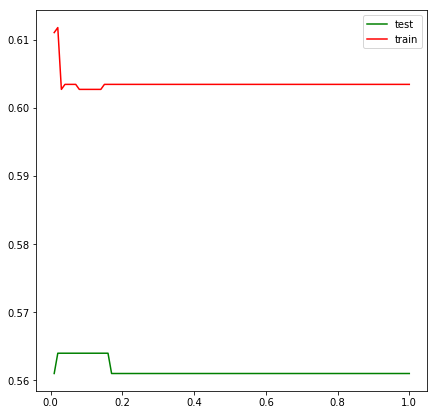

In [26]:
plt.rcParams["figure.figsize"] = (7, 7)
test = plt.plot(C_range, roc_auc_test, label='test', color='green')
train = plt.plot(C_range, roc_auc_train, label='train', color='red')
plt.legend(handles=(test[0], train[0]), labels=('test','train'))
plt.show()

### Train your Logistic Regression model with the best value of C. Which observations are the hardest ones to classify by our model? We can assume that those elements that are harder to classify are those where the probabilities of a positive and a negative are the closest.

In [27]:
c_best = LogisticRegression(C=0.1)

In [33]:
c_best.fit(X_train, y_train)
prob = c_best.predict_proba(X_test)
prob[90]

array([0.50251908, 0.49748092])

Looking for observations where difference in probabilites of pos/neg is within 0.1

In [36]:
indices = []
index = 0
while index < len(prob):
    if abs(prob[index][1] - prob[index][0]) <= 0.1:
        indices.append(index)
    index += 1

In [37]:
indices

[90]